## Big data course

@ Liubov

### Uploading networks from files

There are two main ways of loading network data:
1. from files on your computer: 

    a. load adjacency matrix $A$, 
    
    b. load list of nodes and edges (edgelists),

2. from url direct upload from internet




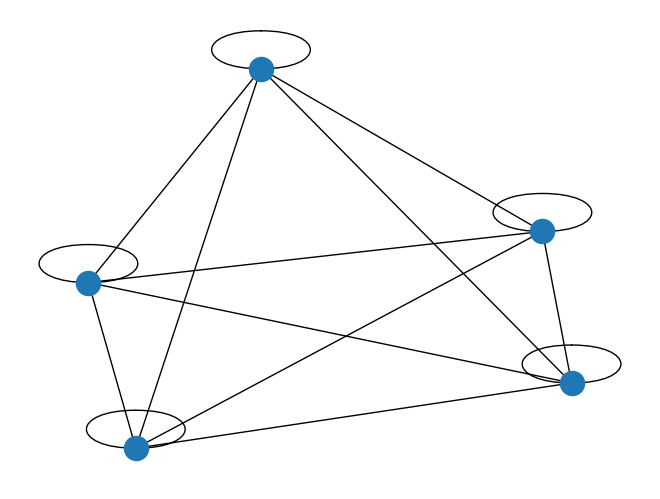

In [1]:
#loading network from a random matrix
import numpy as np
import networkx as nx

A = np.random.rand(5,5)#np.array([[(1.0, 2)]]) # , dtype=dt)
G = nx.from_numpy_array(A)
#list(G.edges())
nx.draw(G)



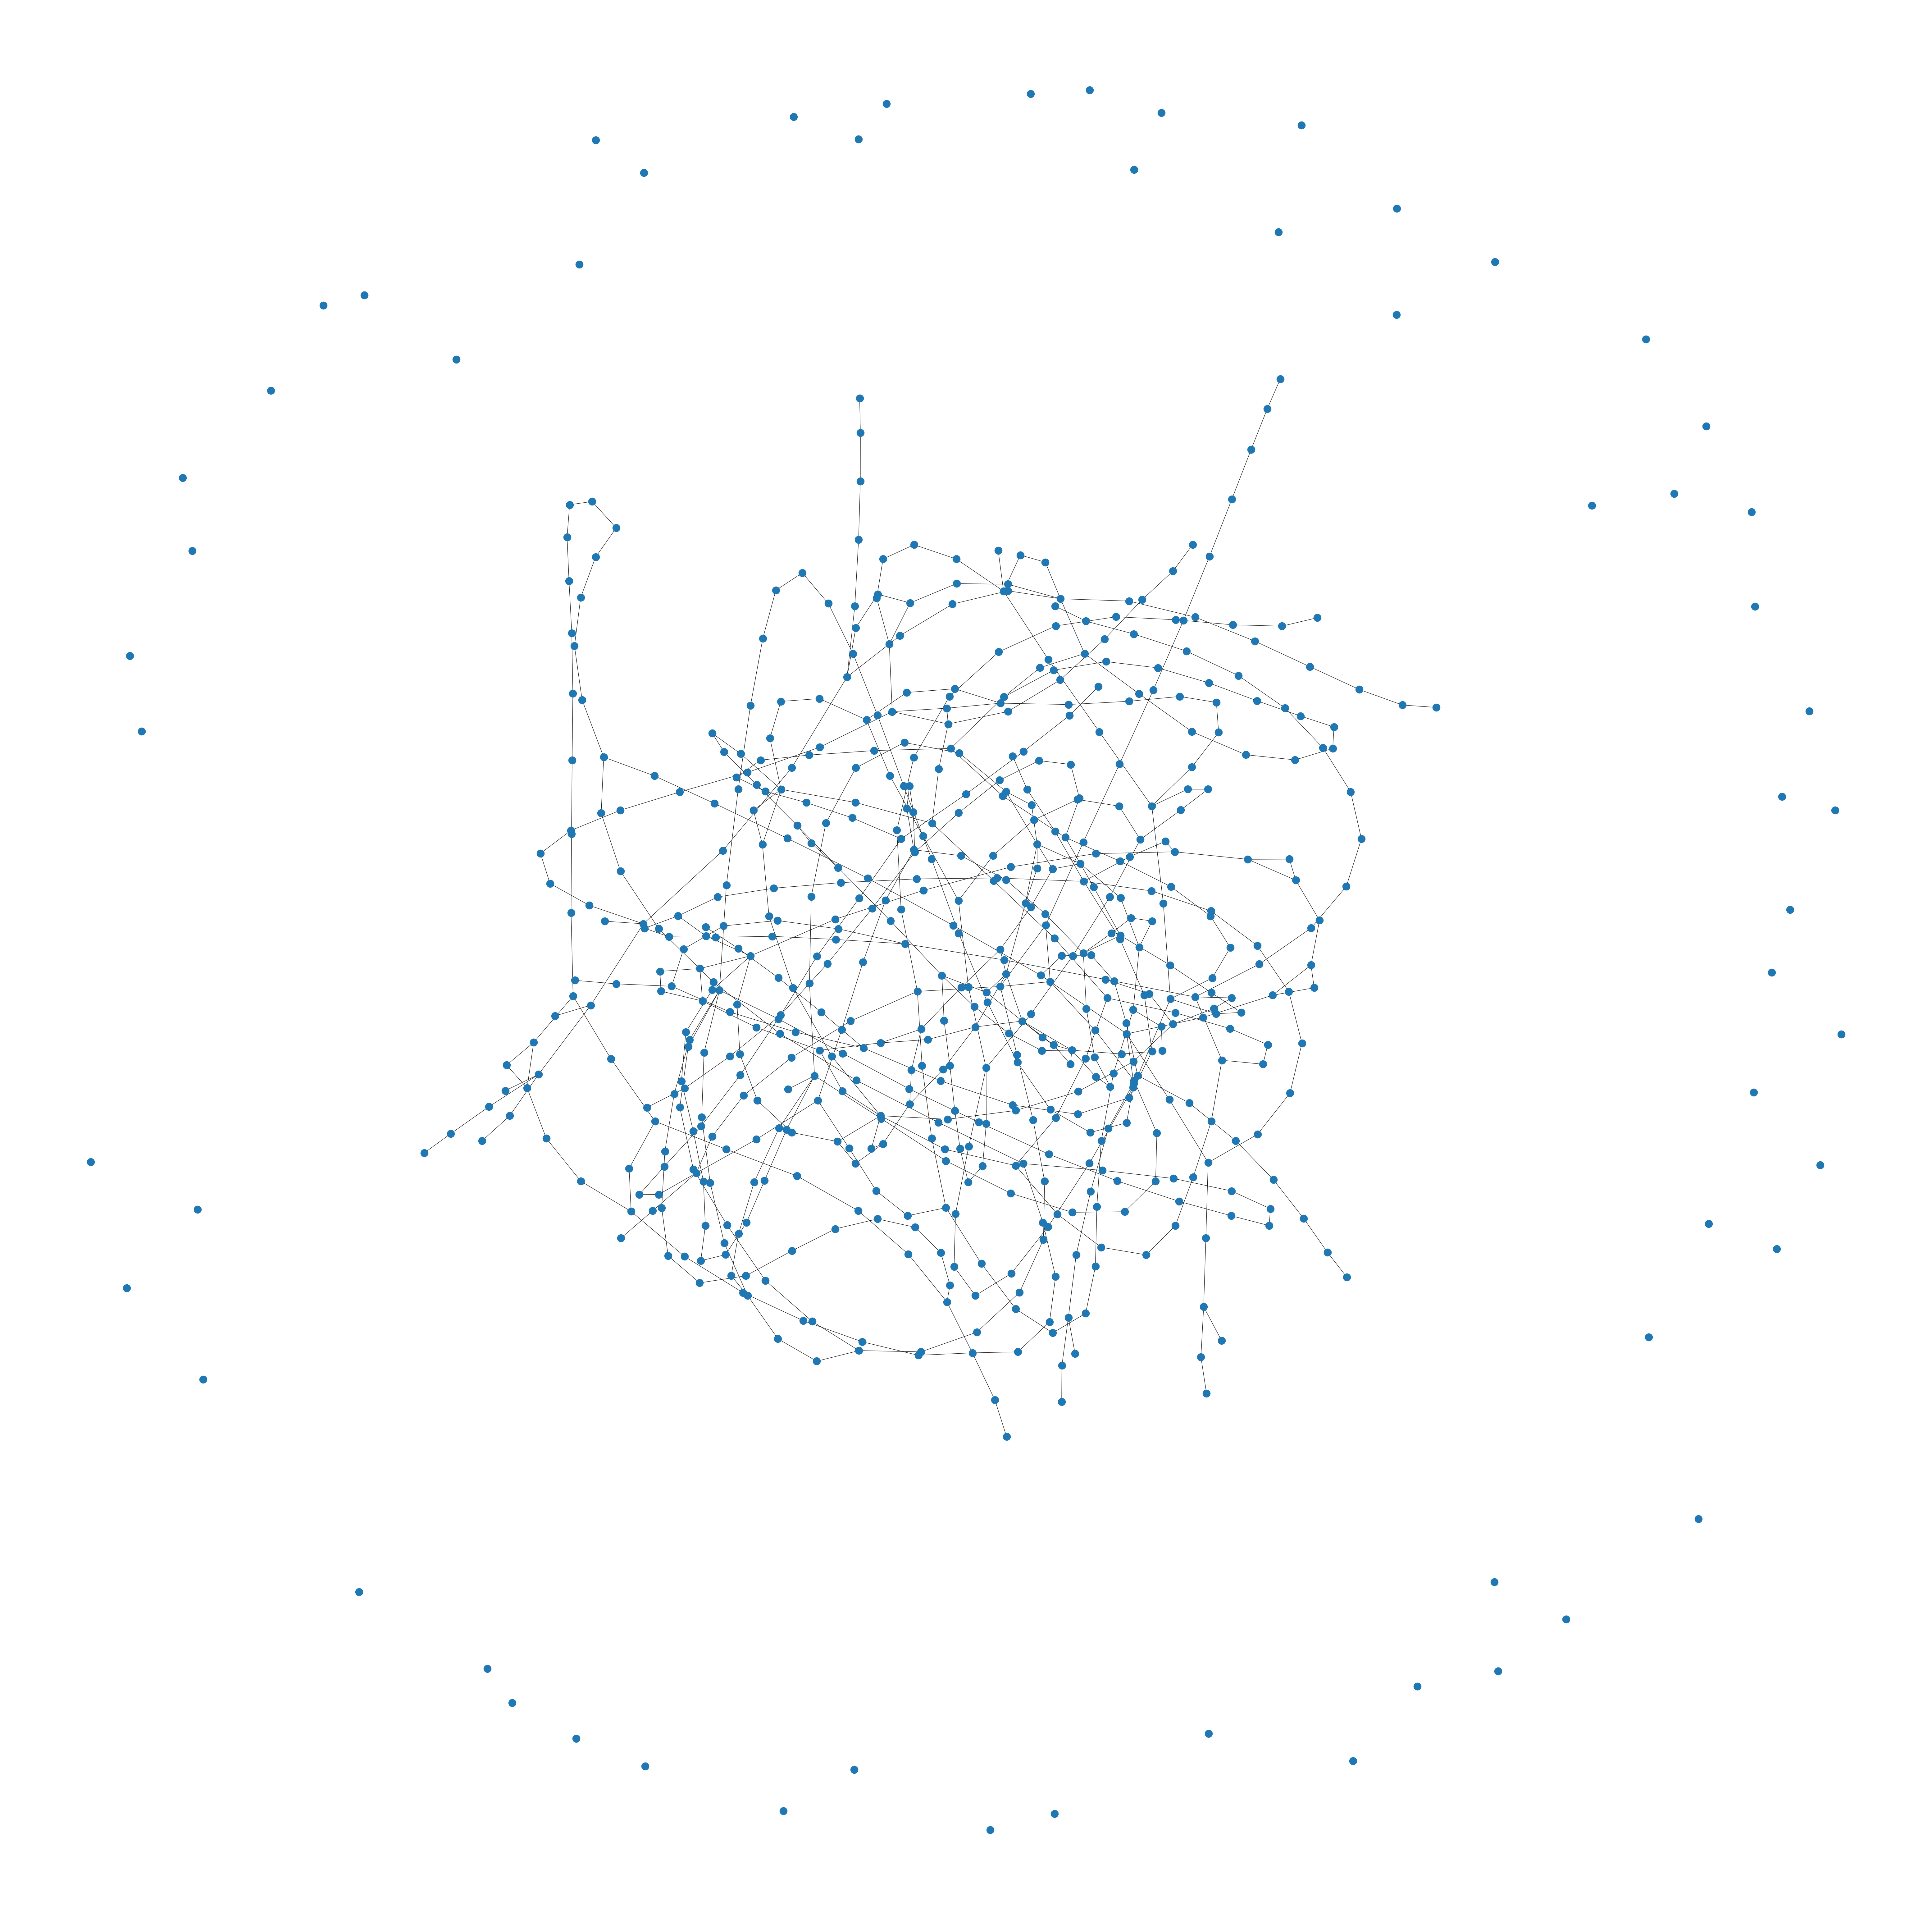

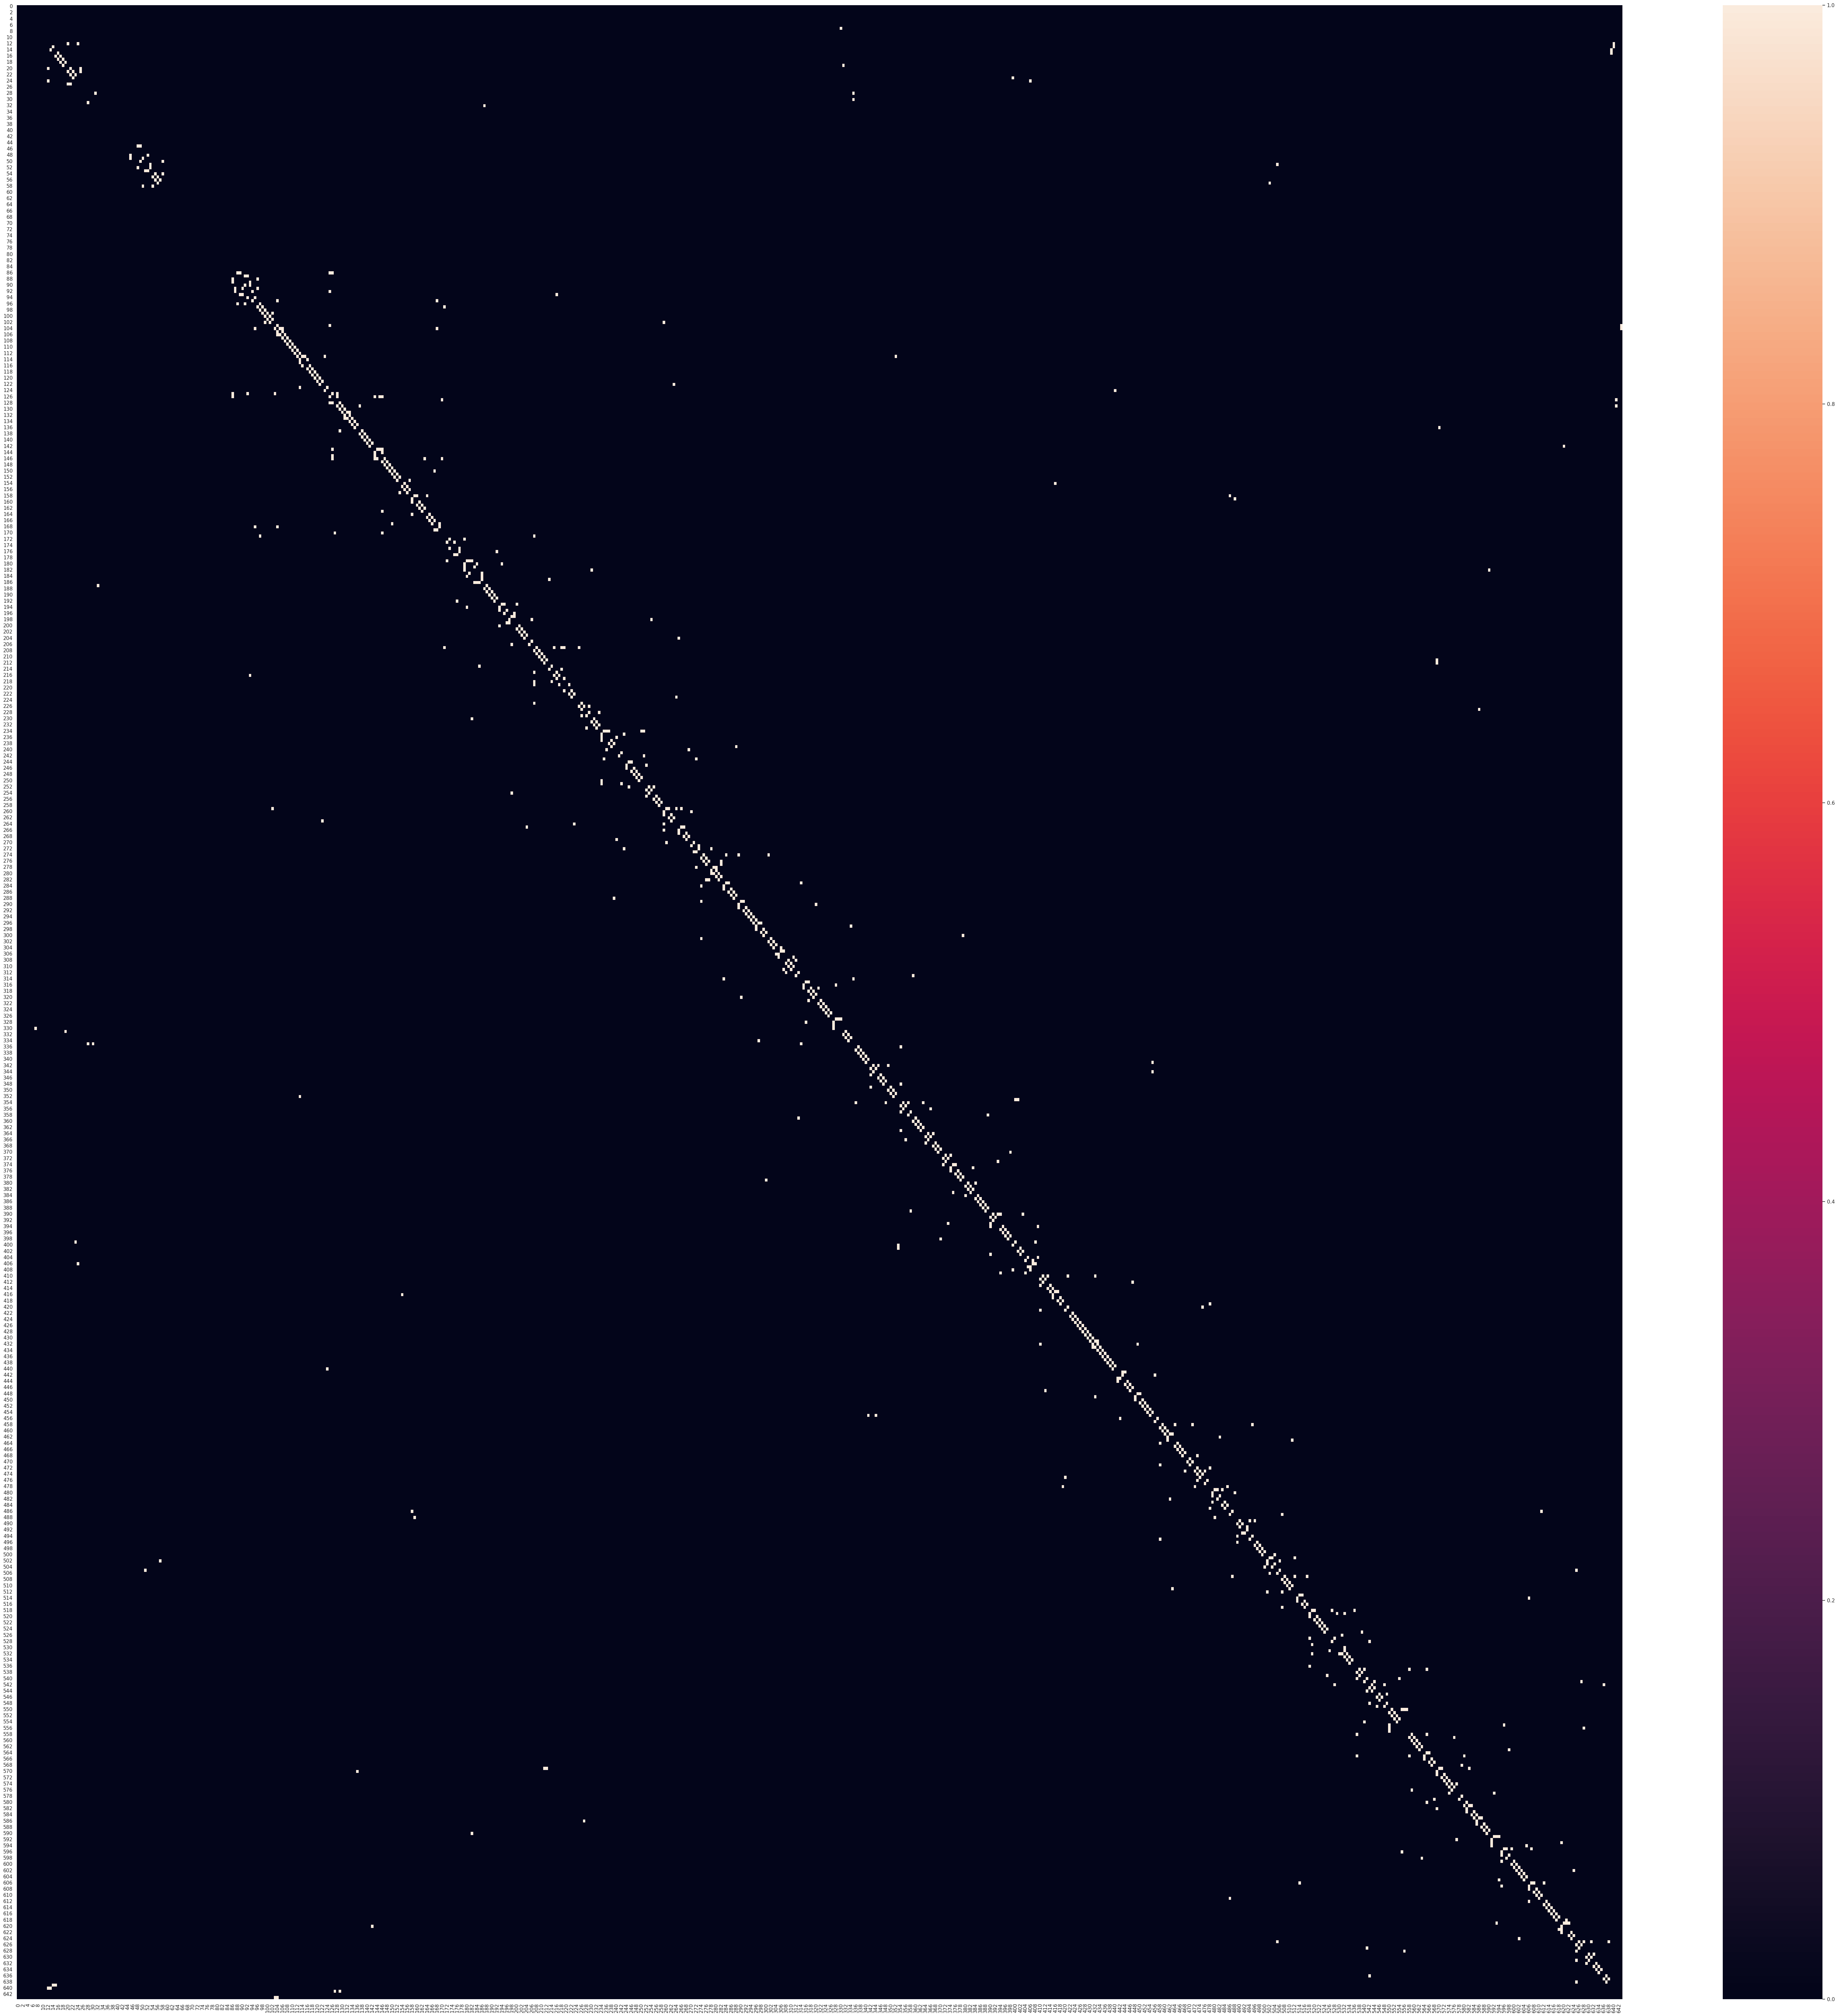

In [2]:

#import scipy as sp
#import scipy.linalg as la
import numpy as np
import pandas as pd
import csv

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
%matplotlib inline


import networkx as nx 

# 1. load network data with adjacency matrix 

matrix = np.loadtxt('data/Belgiummatr.txt')
G = nx.from_numpy_array(matrix)

# 2. visualise a network 

fig, ax = plt.subplots(figsize=(80, 80))
nx.draw(G) 
plt.show()

# 3. visualise adjacency matrix
fig, ax = plt.subplots(figsize=(80, 80))
ax = sns.heatmap(matrix)
plt.show()




# Loading network from edgelist 

Loading network from file: edgelist $E_{ij}$ and nodelist $V_i$ (can contain node attributes such as names, positions, sizes, colors etc.).

Processed 67 lines.
Processed 468 lines.


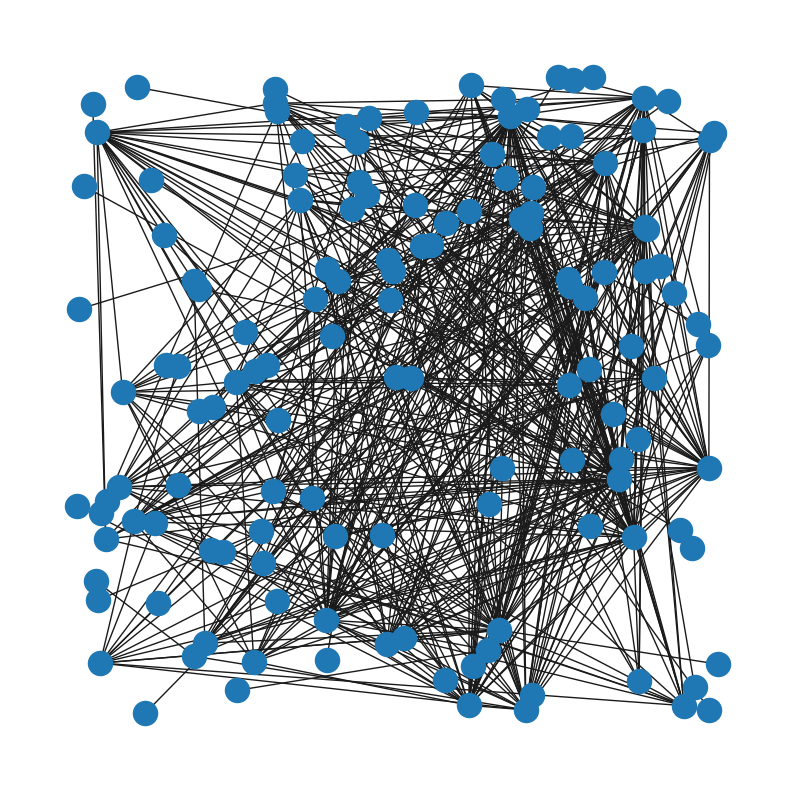

In [3]:
# load networks from file with edge list or node list 

import networkx as nx 
import csv
import matplotlib.pyplot as plt

# 0. generate a network to which we will start adding nodes and edges 

G = nx.Graph() # create an empty graph 

# 1. load network of countries collaborating in open science publications

with open('data/nodes_countries.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        G.add_node(row[0])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        line_count += 1
        G.add_edge(row[0],row[1])
        G.add_edge(row[1],row[0])
        #nx.draw(G, with_labels = True)
    print(f'Processed {line_count} lines.')



with open('data/edges_countries.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        G.add_edge(row[0], row[1])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        #find attribute number in array of nodes
        #plot name of that node
        line_count += 1
    print(f'Processed {line_count} lines.')


    
# 2. draw network   
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_random(G,with_labels = False)
plt.show()
#nx.draw_circular(G) #try different layouts 
#plt.show()
#nx.draw_spectral(G)
plt.show()
    

    

## Different ways of loading a networks 


Yet another way of reading the data from files.

In [4]:
node_csv = open('data/quakers_nodelist.csv', 'r') # opens the file

node_reader = csv.reader(node_csv) # reads the csv

# The csv readers don't support indexing. The value returned is not a list, it is an iterator over the rows. To make them a list:

nodes = []
for row in node_reader:
    nodes.append(row)

node_csv.close() # It is important to close all files we open to save memory. It is good coding practice.


print(nodes[0:10]) # Problem: first item in the list is not data, it is a header.


[['Name', 'Historical Significance', 'Gender', 'Birthdate', 'Deathdate', 'ID'], ['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'], ['Alexander Skene of Newtyle', 'local politician and author', 'male', '1621', '1694', '10011149'], ['James Logan', 'colonial official and scholar', 'male', '1674', '1751', '10007567'], ['Dorcas Erbery', 'Quaker preacher', 'female', '1656', '1659', '10003983'], ['Lilias Skene', 'Quaker preacher and poet', 'male', '1626', '1697', '10011152'], ['William Mucklow', 'religious writer', 'male', '1630', '1713', '10008595'], ['Thomas Salthouse', 'Quaker preacher and writer', 'male', '1630', '1691', '10010643'], ['William Dewsbury', 'Quaker activist', 'male', '1621', '1688', '10003478'], ['John Audland', 'Quaker preacher', 'male', '1630', '1664', '10000411']]


[]

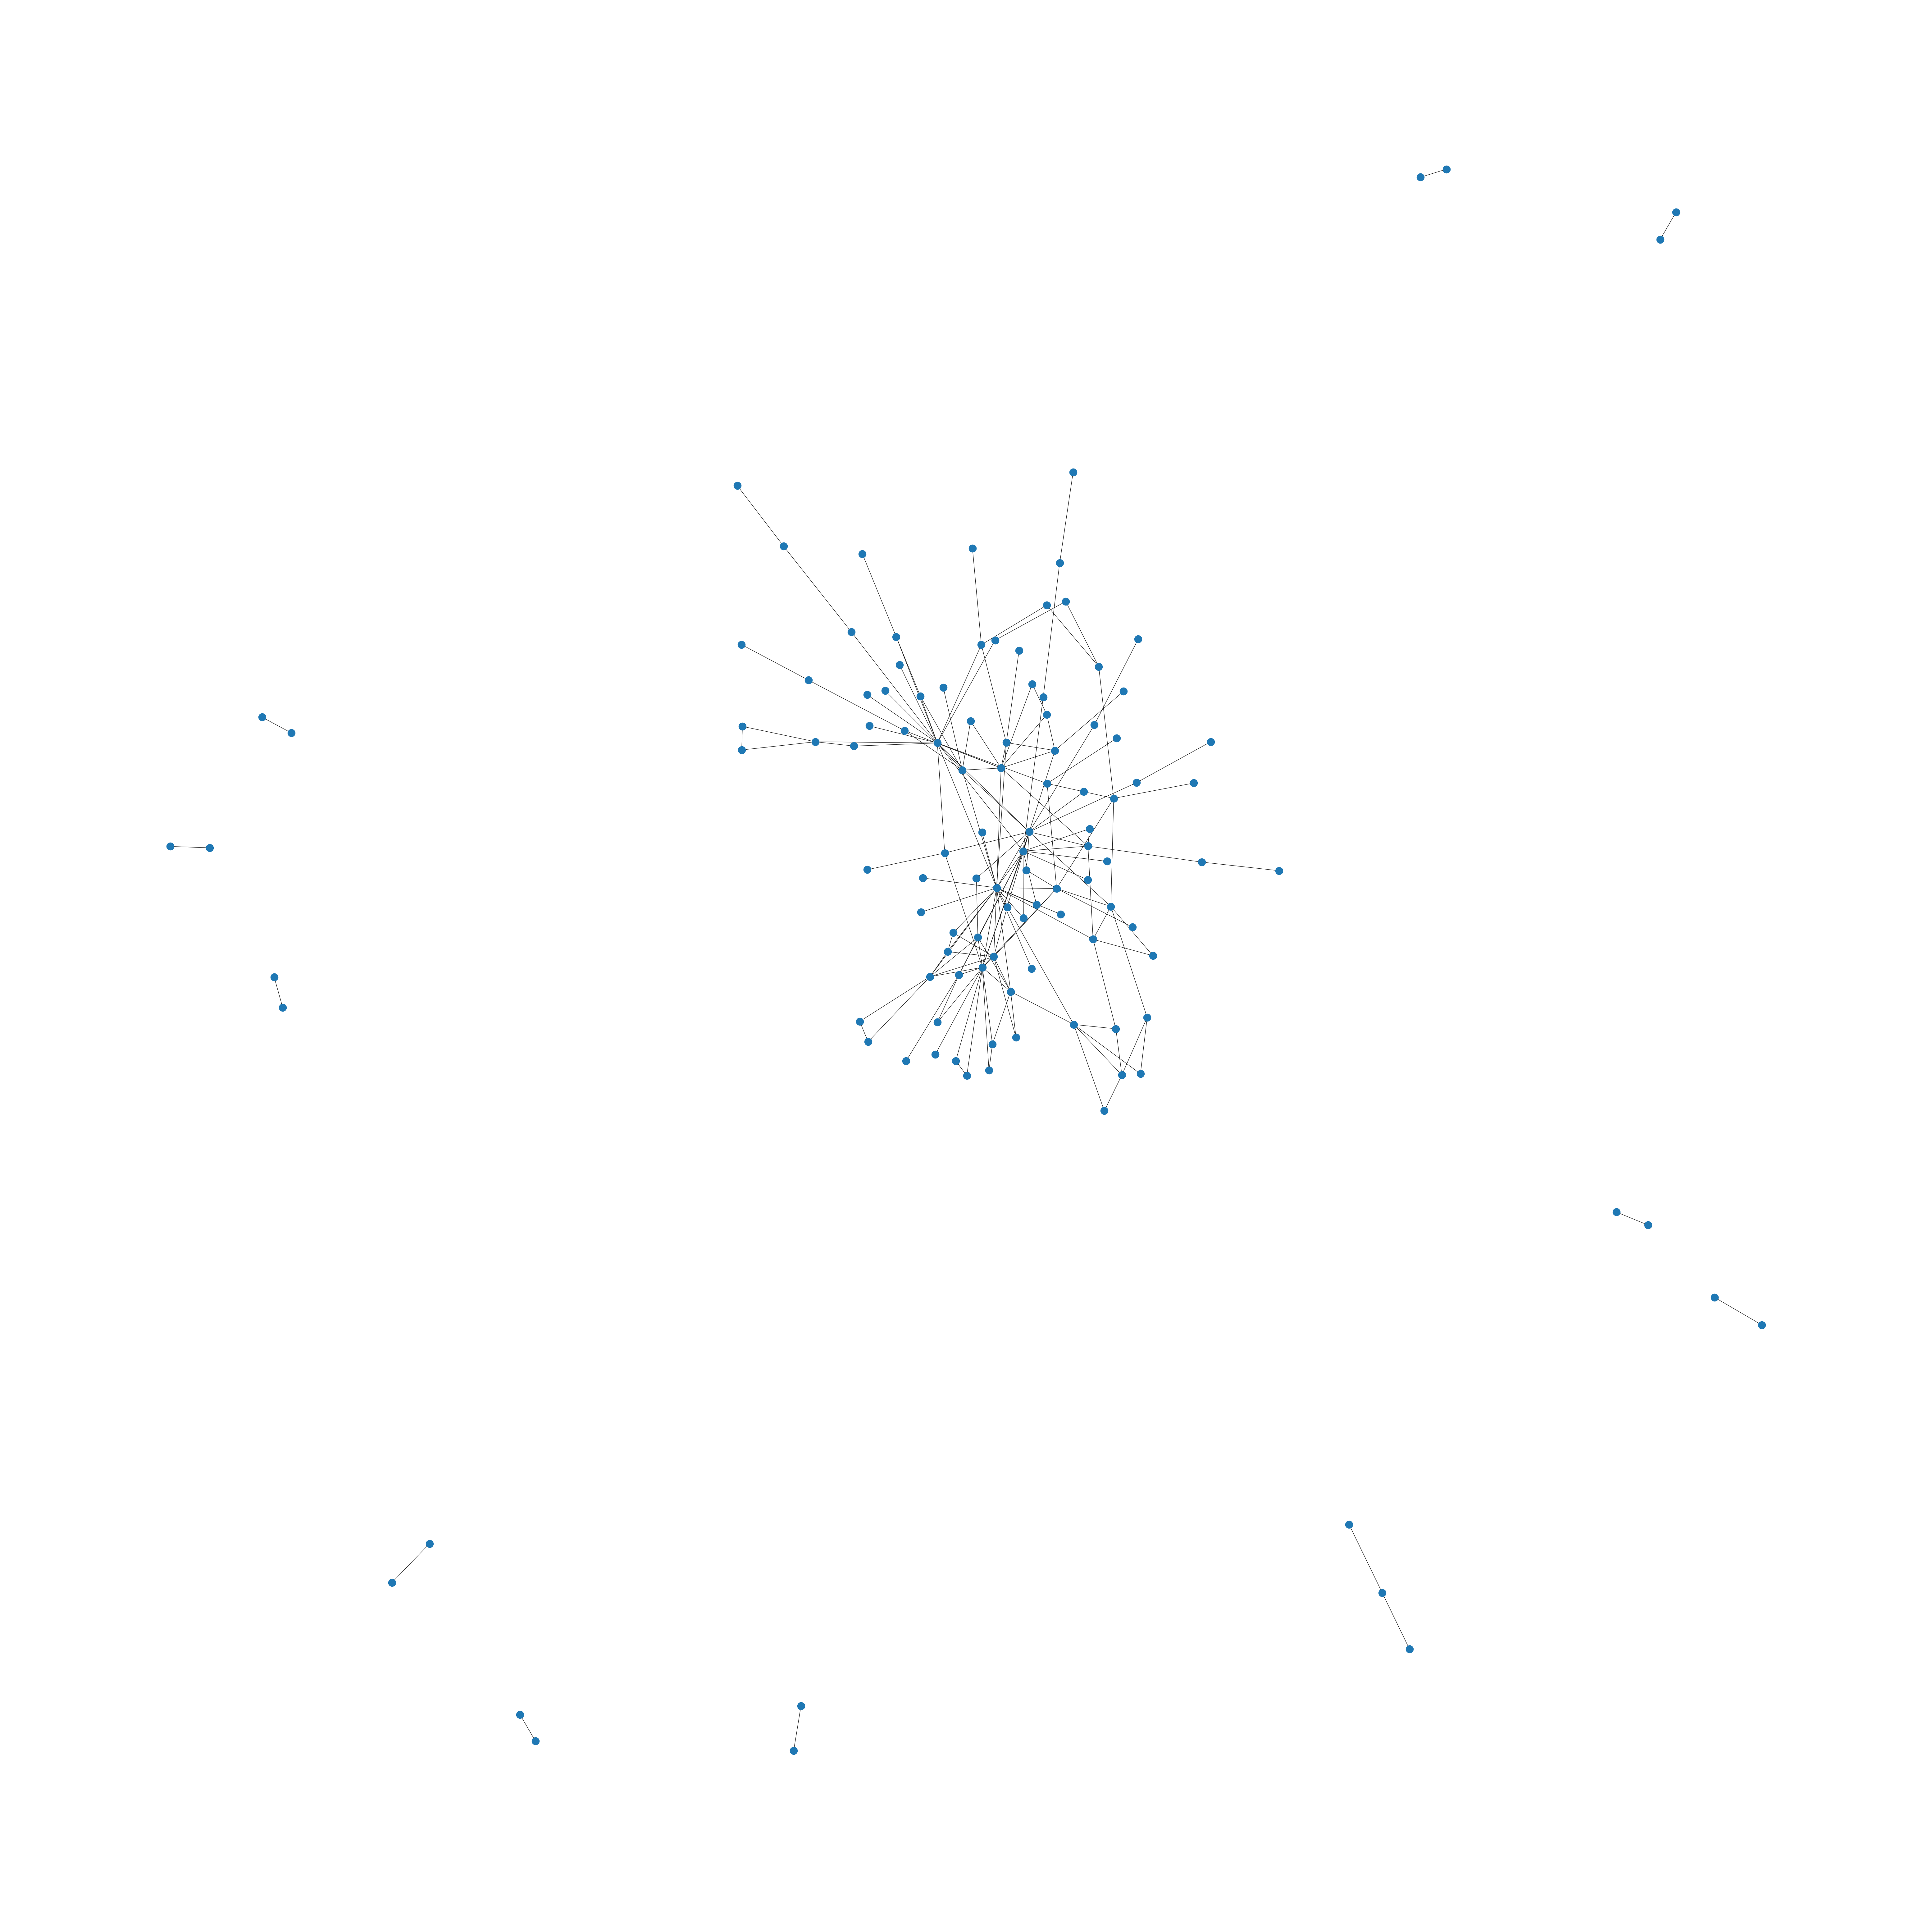

In [5]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
%matplotlib inline


with open('data/quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes]
node_gender = [n[2] for n in nodes]

with open('data/quakers_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:] # the [1:] is only if first line is heading

               
#graph creation of networkx object
G = nx.Graph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)


fig, ax = plt.subplots(figsize=(80, 80))
nx.draw(G)
plt.plot()
#print(nx.info(G))


In [6]:
node_gender = [n[2] for n in nodes]
print(node_gender)

['male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female']


## Well, it does not look good, does it?
What to do?
1. call a designer, designers can really do it well 
2. to use Gephi (wait for next class)
3. do it with python layouts, or make other visualisations and node attributes (see assignments)


mind the color scheme


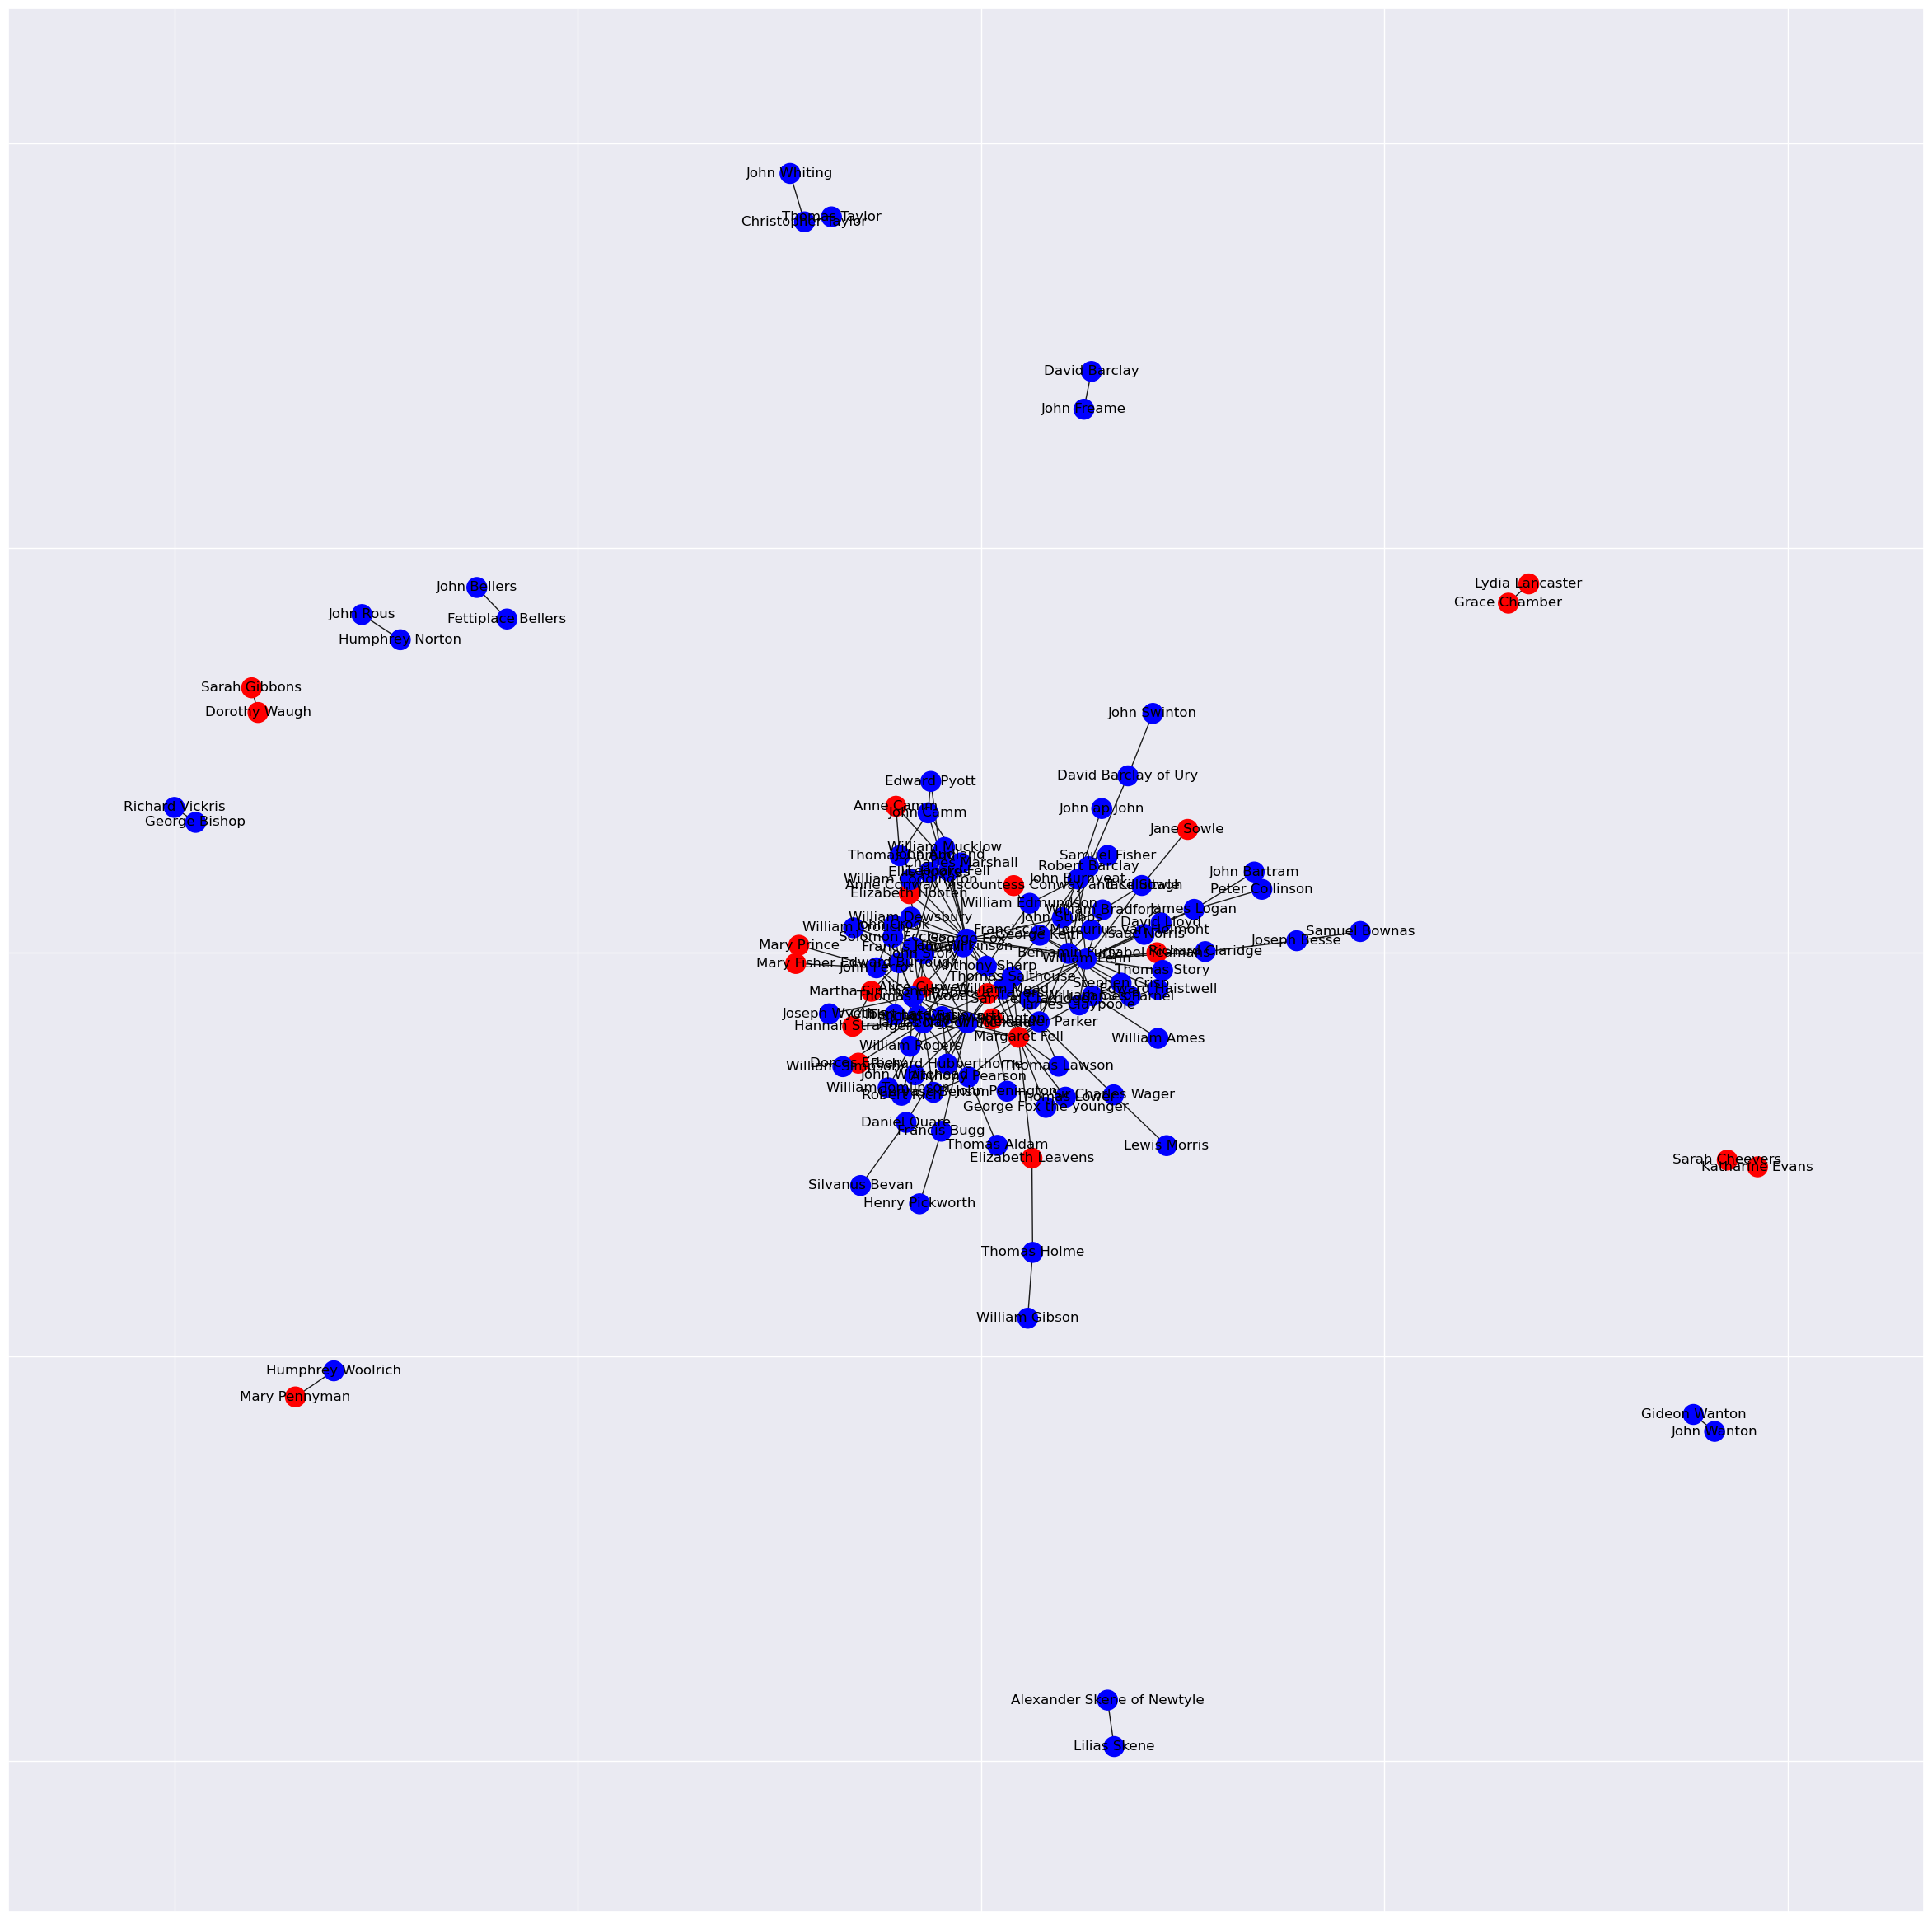

In [7]:
color_map = []

#print(G.nodes)

for i in range( len(G.nodes())):
    sex_i = node_gender[i]
    if sex_i == 'male':
        color_map.append('blue')
    else: 
        color_map.append('red') 

fig, ax = plt.subplots(figsize=(30, 30))
nx.draw_networkx(G, node_size=300,  font_color='black', node_color=color_map)

print('mind the color scheme')

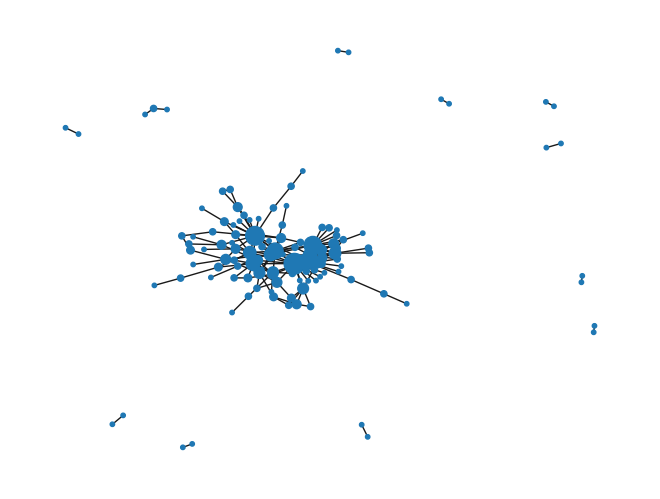

In [8]:
# task: make nodesize proportional to the node degree


deg = nx.degree(G)
degree_values = dict(deg).values()
degree_keys = dict(deg).keys()

nx.draw(G, nodelist=degree_keys, node_size=[v * 10 for v in degree_values])
plt.show()



In [9]:

nx.set_node_attributes(G, node_gender, 'sex')
#nx.set_node_attributes(G, age_dict, 'age') # age can be computed as Deathdate - Birthdate


# Reading network data directly from url 

Careful, since this may take some time!!!

In [32]:
import pandas as pd

# 1. You can download the dataset from internet durectly using pandas
# Other examples of files to download http://networkrepository.com/inf-openflights.php or http://nrvis.com/download/data/inf/inf-openflights.zip

url = "https://snap.stanford.edu/data/loc-brightkite_totalCheckins.txt.gz"
df = pd.read_csv(url, sep='\t', header=0, nrows=500000, 
                 names=['user', 'check-in_time', 
                        "latitude", "longitude", 
                        "location id"])


In [33]:
df.head()

user         check-in_time   latitude   longitude  \
0     0  2010-10-16T06:02:04Z  39.891383 -105.070814   
1     0  2010-10-16T03:48:54Z  39.891077 -105.068532   
2     0  2010-10-14T18:25:51Z  39.750469 -104.999073   
3     0  2010-10-14T00:21:47Z  39.752713 -104.996337   
4     0  2010-10-13T23:31:51Z  39.752508 -104.996637   

                                location id  
0          7a0f88982aa015062b95e3b4843f9ca2  
1          dd7cd3d264c2d063832db506fba8bf79  
2  9848afcc62e500a01cf6fbf24b797732f8963683  
3          2ef143e12038c870038df53e0478cefc  
4          424eb3dd143292f9e013efa00486c907


# Generate adjacency matrix for a network


Loading network from adjacency matrix $A_{ij}$ (can be weighted, e.g. have values of weights, can be directed) and nodelist $V_i$ (can contain node attributes such as names, positions, sizes, colors etc.).

**Important** adjacency matrix and edgelists encode here the same information about the network.

In [ ]:
# define a network with edgelist
node_id = {}
node_count = 0

edge_list = [
    ('A', 'B'),
    ('A', 'C'),
    ('A', 'E'),
    ('B', 'C'),
    ('C', 'D'),
    ('C', 'E'),
    ('D', 'E')]



for node_i, node_j in edge_list:
    if node_i not in node_id:
        node_id[node_i] = node_count
        node_count += 1
    
    # Make sure we have an id for both nodes
    # This is necessary, irregardless of whether the network is directed or undirected
    if node_j not in node_id:
        node_id[node_j] = node_count
        node_count += 1


# construct a corresponding adjacency matrix 
adj_matrix = np.zeros((node_count, node_count), dtype='int')

is_directed = False

for node_i, node_j in edge_list:    
    # Get the correct node ids
    node_i = node_id[node_i]
    node_j = node_id[node_j]
    
    adj_matrix[node_i, node_j] = 1 # Unweighted network

    if not is_directed:
        adj_matrix[node_j, node_i] = 1 # Undirected networks
        
        
print(adj_matrix)

[[0 1 1 1 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [1 0 1 0 1]
 [0 0 1 1 0]]


# Loading network from adjacency matrix
Let us now then just load and plot another adjacency matrix. 

data loaded, now plotting the matrix


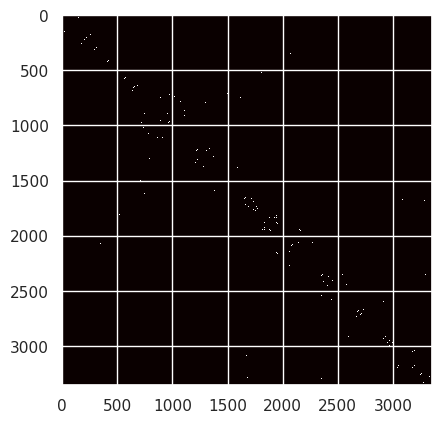

In [11]:
import networkx as nx 
import csv
import matplotlib.pyplot as plt
import numpy as np

#matrix may be heavy

adj_matix = np.loadtxt('data/adj_matrixpowergrid.txt', delimiter = ',')
print('data loaded, now plotting the matrix')


plt.imshow(adj_matix, cmap='hot', interpolation='nearest')
plt.show()



network created from adjacency matrix
5006
3353


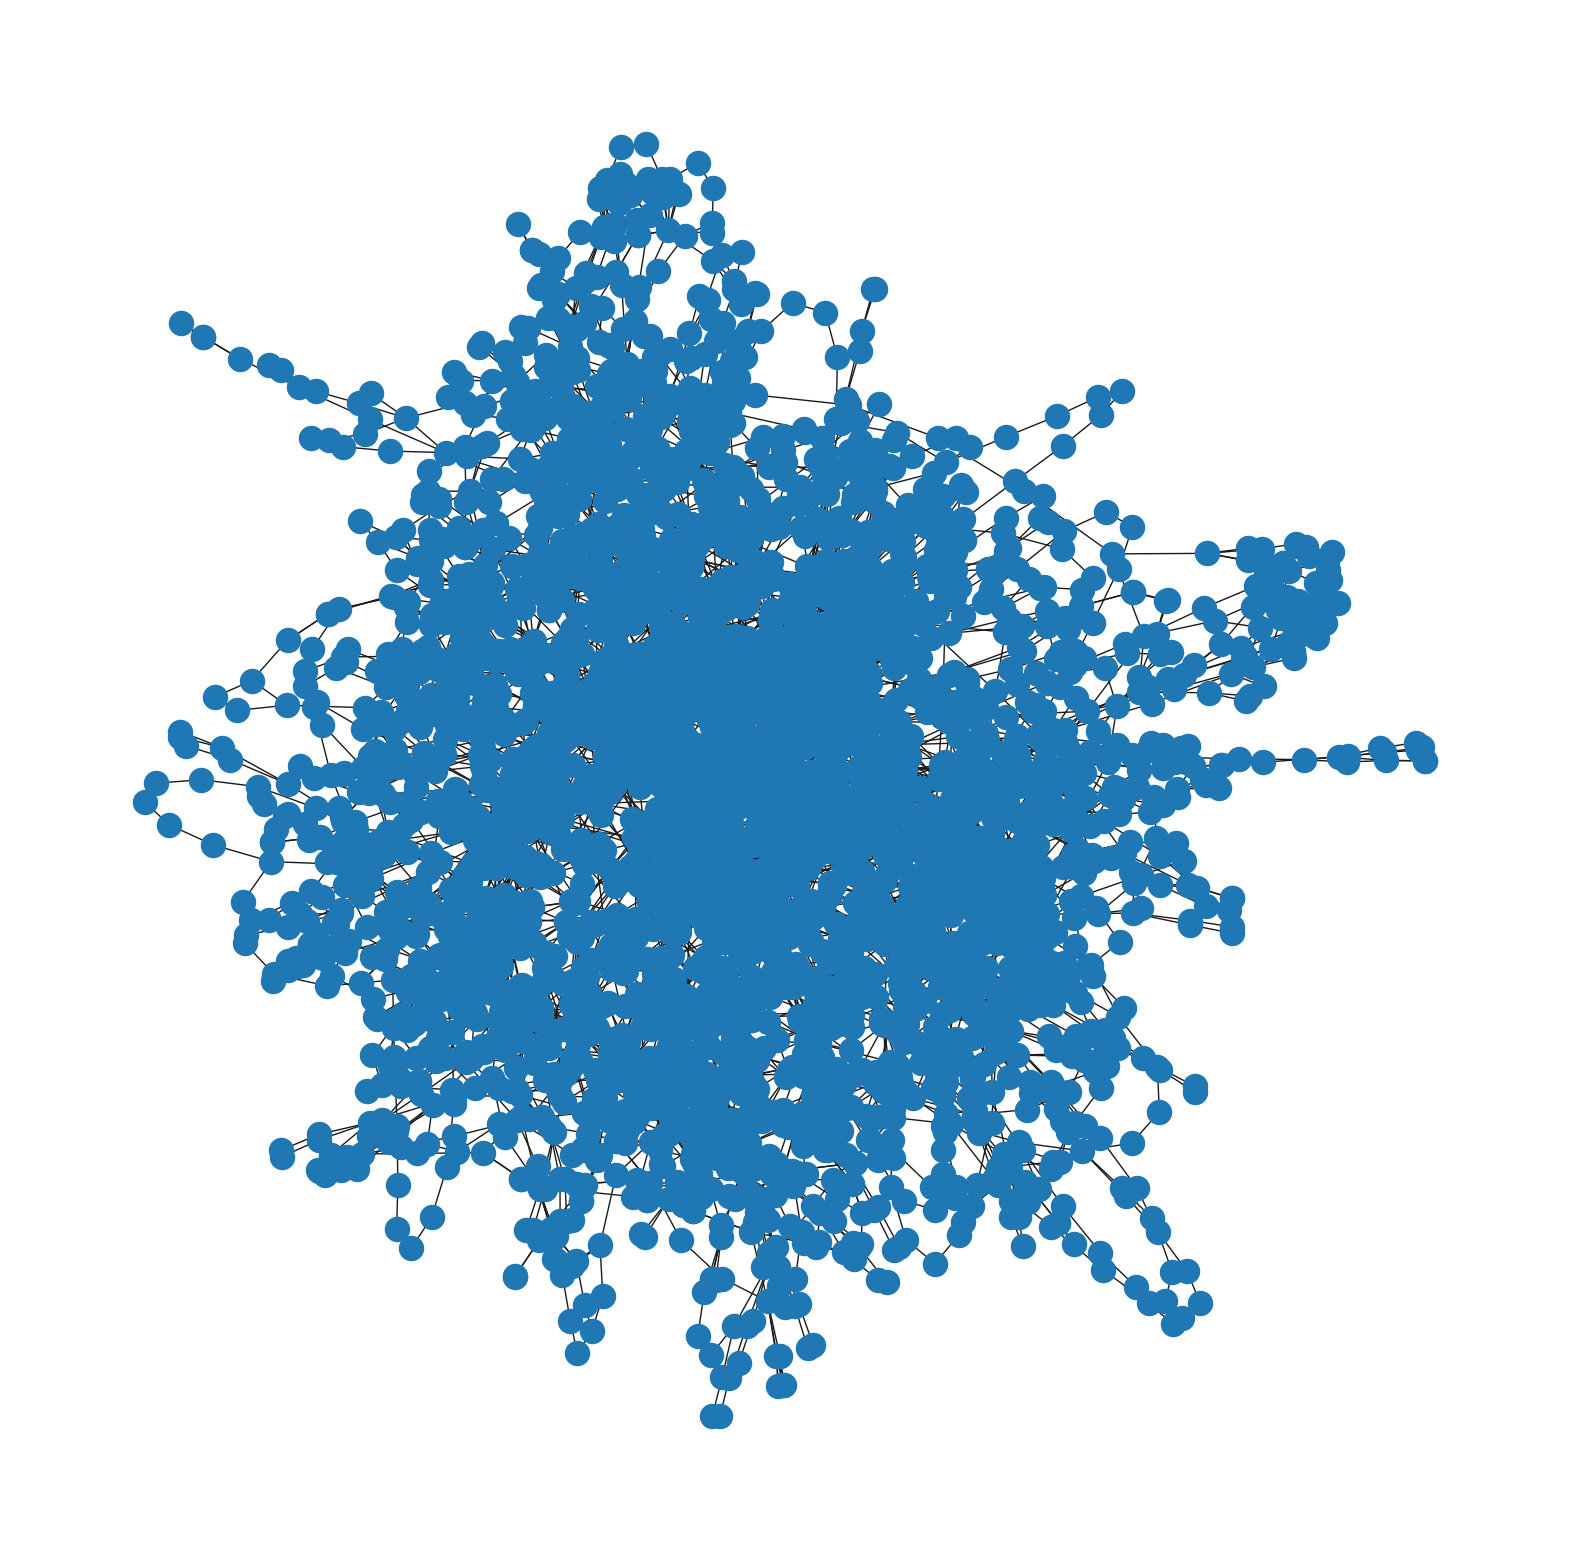

calculate network measures for a network...
fitting power law for degree sequence for scale-free network


In [22]:

Graph = nx.from_numpy_array(adj_matix)
print('network created from adjacency matrix')

#Greg1 = nx.random_geometric_graph(20, 0.1)
#Greg2 = nx.random_regular_graph(3, 100)

print(Graph.number_of_edges())
print(Graph.number_of_nodes())

fig, ax = plt.subplots(figsize=(20, 20))
nx.draw(Graph)
plt.show()

print('calculate network measures for a network...')
#measures_for_network(Graph)

# Quizz for next day

print('fitting power law for degree sequence for scale-free network')




## Try it yourself 

1. Load and make analysis of highschool students https://networks.skewed.de/net/highschool
2. Do analysis of loaded network from file (degree, betweenness, closeness etc)
3. Try different visualisation of **Quarkers network** with attributes: make node size proportional to the node degree


## Highschool

In [23]:
highschool_edges = pd.read_csv('data/highschool_edges.csv')
highschool_nodes = pd.read_csv('data/highschool_nodes.csv')

In [24]:
display(highschool_edges.describe())
highschool_edges.head()

source      target      weight
count  366.000000  366.000000  366.000000
mean    35.196721   32.584699    1.382514
std     20.095514   19.301563    0.486666
min      0.000000    0.000000    1.000000
25%     18.000000   16.000000    1.000000
50%     37.000000   32.000000    1.000000
75%     53.000000   45.000000    2.000000
max     69.000000   69.000000    2.000000

source  target  weight
0       0       1       1
1       0       2       2
2       0       3       2
3       0       4       1
4       0       5       1

In [25]:
display(highschool_nodes.describe())
highschool_nodes.head()

idx
count  70.000000
mean   34.500000
std    20.351085
min     0.000000
25%    17.250000
50%    34.500000
75%    51.750000
max    69.000000

idx                               _pos
0    0  array([ 0.92308158, 12.18608286])
1    1  array([ 1.26290644, 12.21321324])
2    2  array([ 1.10827447, 12.19021191])
3    3  array([ 0.96639457, 12.31484945])
4    4  array([ 1.08272966, 12.3552479 ])

In [26]:
from ast import literal_eval
import re

highschool_nodes._pos = highschool_nodes._pos.apply(lambda x: tuple(literal_eval(re.split('\(|\)', x)[1])))

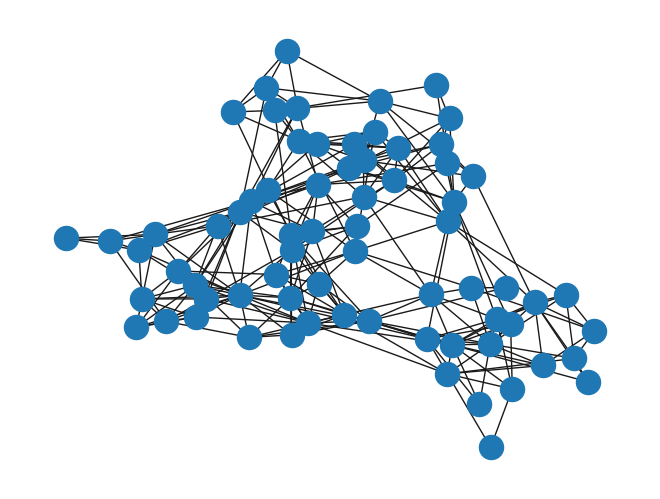

In [28]:
G = nx.Graph()

for i, row in highschool_nodes.iterrows():
    G.add_node(row.idx, pos=row._pos)

for i, row in highschool_edges.iterrows():
    G.add_edge(row.source, row.target, weight=row.weight)
    
nx.draw(G) 
plt.show()

[(0, 7), (1, 5), (2, 5), (3, 14), (4, 13), (5, 13), (6, 13), (7, 3), (8, 9), (9, 2), (10, 6), (11, 9), (12, 8), (13, 6), (14, 10), (15, 11), (16, 5), (17, 6), (18, 10), (19, 6), (20, 9), (21, 8), (22, 5), (23, 3), (24, 5), (25, 6), (26, 13), (27, 19), (28, 3), (29, 7), (30, 8), (31, 9), (32, 9), (33, 10), (34, 7), (35, 9), (36, 15), (37, 7), (38, 9), (39, 13), (40, 7), (41, 8), (42, 8), (43, 9), (44, 8), (45, 15), (46, 2), (47, 9), (48, 5), (49, 8), (50, 3), (51, 5), (52, 7), (53, 9), (54, 4), (55, 12), (56, 6), (57, 7), (58, 8), (59, 2), (60, 6), (61, 7), (62, 13), (63, 7), (64, 7), (65, 6), (66, 9), (67, 8), (68, 3), (69, 5)]


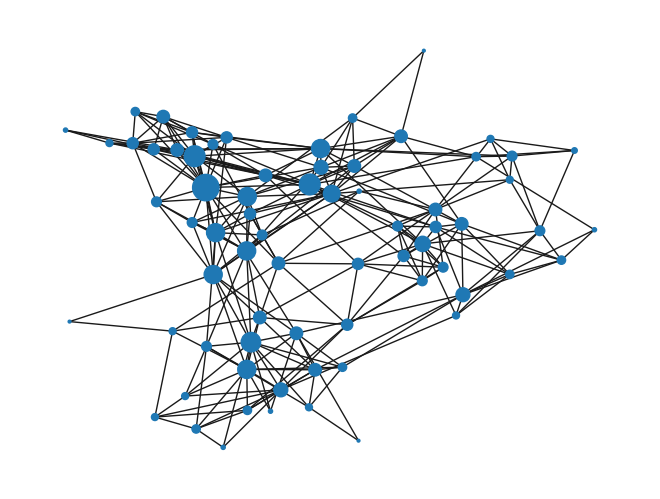

In [20]:
deg = nx.degree(G)
degree_values = dict(deg).values()
degree_keys = dict(deg).keys()

print(deg)

nx.draw(G, nodelist=degree_keys, node_size=[v * v for v in degree_values])
plt.show()

{0: 0.024078062655201602, 1: 0.00367195665029868, 2: 0.003996551732372403, 3: 0.0738715033766092, 4: 0.04104057283154136, 5: 0.05891599196573137, 6: 0.04979118842821642, 7: 0.0, 8: 0.07878654845074227, 9: 0.0005318089087082619, 10: 0.0036940663633110984, 11: 0.038511200431089715, 12: 0.021527619462929495, 13: 0.004145570884325209, 14: 0.07021034782954365, 15: 0.04602713763516388, 16: 0.02302850275863054, 17: 0.007372462547522535, 18: 0.04291824525269781, 19: 0.0036609975485249655, 20: 0.025833268797832334, 21: 0.03840824748028141, 22: 0.002475522488310212, 23: 0.00010656436487638534, 24: 0.01702552795804203, 25: 0.00827305099438543, 26: 0.07533624881635995, 27: 0.14670925426848025, 28: 0.004117585569680293, 29: 0.006512959940623727, 30: 0.01905574338510882, 31: 0.031781797693406964, 32: 0.019110140371485587, 33: 0.02674615110264915, 34: 0.007964569274308006, 35: 0.021060679523685677, 36: 0.09900819263796734, 37: 0.028921462449703117, 38: 0.036222590936201685, 39: 0.05889087970643853, 4

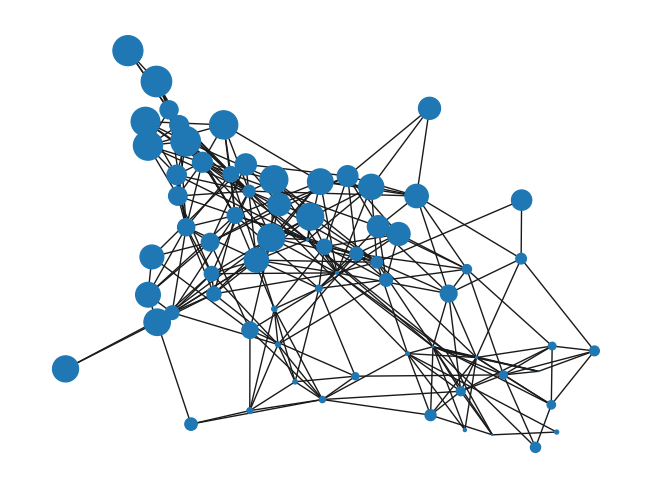

In [29]:
betweenness = nx.betweenness_centrality(G)
print(betweenness)
nx.draw(G, nodelist=degree_keys, node_size=[v*(v/10) for v in betweenness])
plt.show()

{0: 0.3709677419354839, 1: 0.32547169811320753, 2: 0.323943661971831, 3: 0.4233128834355828, 4: 0.40350877192982454, 5: 0.4423076923076923, 6: 0.44805194805194803, 7: 0.3399014778325123, 8: 0.44805194805194803, 9: 0.3150684931506849, 10: 0.3612565445026178, 11: 0.3988439306358382, 12: 0.3942857142857143, 13: 0.3520408163265306, 14: 0.41566265060240964, 15: 0.41818181818181815, 16: 0.375, 17: 0.34328358208955223, 18: 0.3770491803278688, 19: 0.32701421800947866, 20: 0.3988439306358382, 21: 0.39204545454545453, 22: 0.3026315789473684, 23: 0.3209302325581395, 24: 0.35751295336787564, 25: 0.3770491803278688, 26: 0.4726027397260274, 27: 0.5, 28: 0.32857142857142857, 29: 0.3670212765957447, 30: 0.40828402366863903, 31: 0.3988439306358382, 32: 0.42857142857142855, 33: 0.4423076923076923, 34: 0.38333333333333336, 35: 0.42592592592592593, 36: 0.46621621621621623, 37: 0.375, 38: 0.42073170731707316, 39: 0.42073170731707316, 40: 0.3770491803278688, 41: 0.3898305084745763, 42: 0.41317365269461076, 

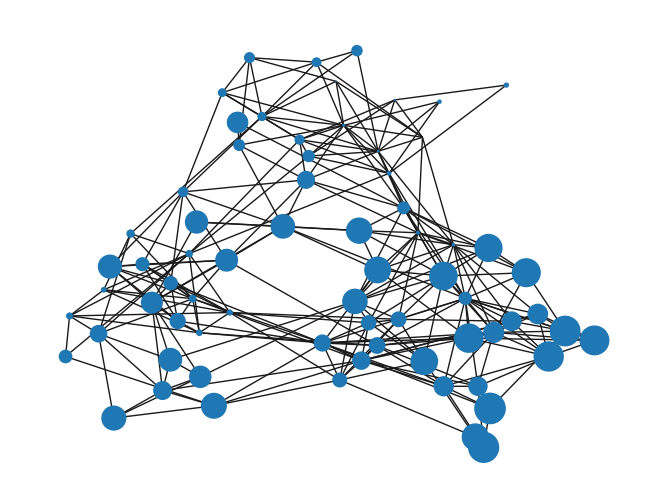

In [30]:
closeness = nx.closeness_centrality(G)
print(closeness)
nx.draw(G, nodelist=degree_keys, node_size=[v*(v/10) for v in closeness])
plt.show()

{0: 30.249999999999982, 1: 26.466666666666647, 2: 26.18333333333332, 3: 35.58333333333333, 4: 33.999999999999986, 5: 36.25, 6: 36.33333333333333, 7: 26.283333333333314, 8: 34.999999999999986, 9: 23.816666666666652, 10: 28.749999999999982, 11: 32.24999999999998, 12: 31.583333333333314, 13: 28.333333333333318, 14: 33.33333333333332, 15: 34.083333333333336, 16: 29.499999999999982, 17: 28.06666666666665, 18: 31.64999999999997, 19: 26.966666666666647, 20: 32.16666666666663, 21: 31.33333333333331, 22: 24.833333333333325, 23: 25.299999999999983, 24: 28.283333333333317, 25: 29.749999999999964, 26: 37.5, 27: 40.83333333333333, 28: 25.33333333333332, 29: 29.499999999999982, 30: 32.41666666666666, 31: 32.69999999999999, 32: 33.91666666666667, 33: 35.0, 34: 30.749999999999986, 35: 33.91666666666666, 36: 38.25, 37: 29.99999999999999, 38: 33.58333333333332, 39: 35.58333333333333, 40: 30.333333333333318, 41: 31.24999999999999, 42: 32.499999999999986, 43: 32.249999999999986, 44: 32.08333333333333, 45:

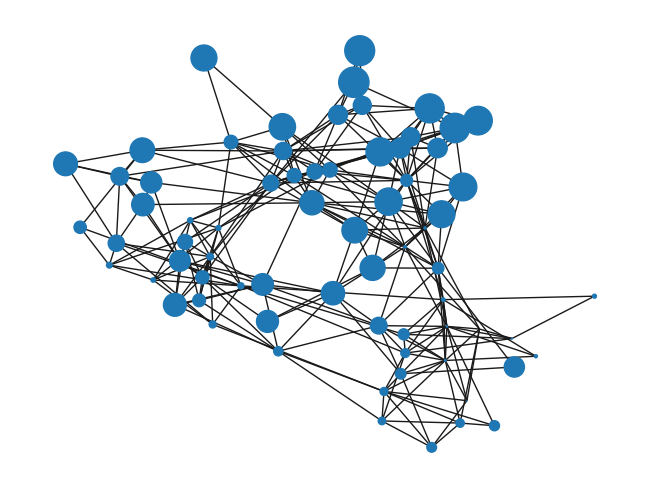

In [31]:
harmonic = nx.harmonic_centrality(G)
print(harmonic)
nx.draw(G, nodelist=degree_keys, node_size=[v*(v/10) for v in harmonic])
plt.show()

## Quakers

In [35]:
quakers_edges = pd.read_csv('data/quakers_edgelist.csv')
quakers_nodes = pd.read_csv('data/quakers_nodelist.csv')

In [36]:
display(quakers_edges.describe())
quakers_edges.head()

Source        Target
count          174           174
unique          78            77
top     George Fox  William Penn
freq            17            11

Source                                         Target
0  George Keith                                 Robert Barclay
1  George Keith                                 Benjamin Furly
2  George Keith  Anne Conway Viscountess Conway and Killultagh
3  George Keith               Franciscus Mercurius van Helmont
4  George Keith                                   William Penn

In [37]:
display(quakers_nodes.describe())
quakers_nodes.head()

Birthdate    Deathdate            ID
count   119.000000   119.000000  1.190000e+02
mean   1631.327731  1700.268908  1.000708e+07
std      31.661373    30.829410  6.039569e+03
min    1551.000000  1656.000000  1.000010e+07
25%    1618.000000  1678.500000  1.000289e+07
50%    1630.000000  1696.000000  1.000678e+07
75%    1651.000000  1717.000000  1.001057e+07
max    1699.000000  1777.000000  1.005485e+07

Name        Historical Significance  Gender  \
0                Joseph Wyeth               religious writer    male   
1  Alexander Skene of Newtyle    local politician and author    male   
2                 James Logan  colonial official and scholar    male   
3               Dorcas Erbery                Quaker preacher  female   
4                Lilias Skene       Quaker preacher and poet    male   

   Birthdate  Deathdate        ID  
0       1663       1731  10013191  
1       1621       1694  10011149  
2       1674       1751  10007567  
3       1656       1659  10003983  
4       1626       1697  10011152

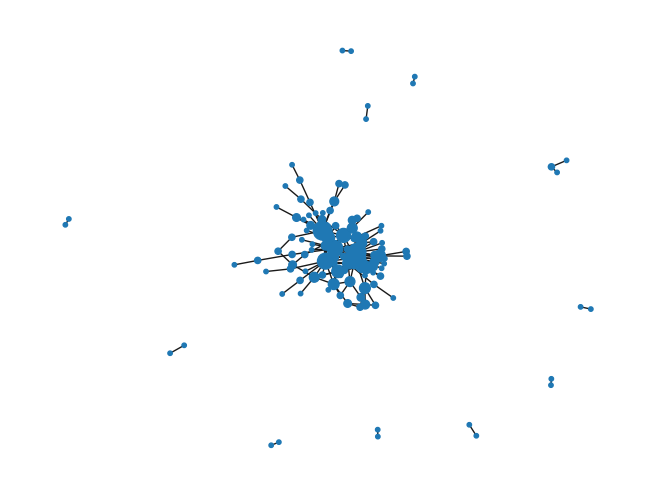

In [47]:
G = nx.from_pandas_edgelist(quakers_edges, source='Source', target='Target')
G.add_nodes_from(quakers_nodes)
    
deg = nx.degree(G)
degree_values = dict(deg).values()
degree_keys = dict(deg).keys()

nx.draw(G, nodelist=degree_keys, node_size=[v*10 for v in degree_values])
plt.show()